In [1]:
pip install pandas matplotlib statsmodels scikit-learn numpy tensorflow prophet openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 98.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 82.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


imports essential libraries and modules for advanced data analysis and modeling in Python. NumPy and Pandas are used for numerical operations and data manipulation, while scikit-learn provides tools like MinMaxScaler for data preprocessing. TensorFlow's Keras API is imported for building deep learning models such as LSTM and SimpleRNN, along with utilities like TimeseriesGenerator for handling time series data. These libraries enable tasks ranging from time series forecasting using statistical models like ARIMA and SARIMAX from statsmodels to building neural network models for predictive analytics.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from statsmodels.tsa.vector_ar.var_model import VAR
import warnings
from statsmodels.tsa.api import VAR

warnings.filterwarnings('ignore')


2024-07-21 16:03:02.817622: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-21 16:03:16.922216: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Matplotlib is building the font cache; this may take a moment.


defines a function load_data_and_eda that reads multiple sheets from an Excel file specified by file_path. It parses each sheet into a Pandas DataFrame, excludes the last row for data consistency, and dynamically assigns variable names (data_frame1, data_frame2, etc.) to each DataFrame based on their sheet order. This setup enables streamlined initial data exploration and manipulation within Python, leveraging Pandas' functionality for handling structured data from Excel files.

In [3]:
file_path = 's_data.xlsx'

# Function to load data and perform EDA
def load_data_and_eda(file_path):
    excel_data = pd.ExcelFile(file_path)
    sheet_names = excel_data.sheet_names

    for i, sheet in enumerate(sheet_names):
        df = pd.read_excel(file_path, sheet_name=sheet, parse_dates=['Date'])

        # Ignore the last row
        df = df.iloc[:-1]

        # Dynamically create variable names for each DataFrame
        globals()[f"data_frame{i+1}"] = df


 data preparation and cleaning for the `Sberbank_df` DataFrame, which was loaded and manipulated using the `load_data_and_eda` function earlier. It drops any rows with missing values (`dropna`), converts the 'Date' column to datetime format (`pd.to_datetime`), and ensures numeric columns ('Price', 'Open', 'High', 'Low', 'Vol.') are correctly typed using `astype` and `pd.to_numeric`. The DataFrame is then indexed by the 'Date' column (`set_index('Date')`) and any remaining NaN values are removed again (`dropna`). Finally, it displays concise information about the DataFrame (`info()`).

This process ensures the `Sberbank_df` DataFrame is properly formatted and ready for further analysis or modeling tasks, adhering to best practices in data preprocessing to maintain data integrity and consistency.

In [4]:
# Load data and perform EDA
load_data_and_eda(file_path)

Sberbank_df = data_frame1
Koc_df = data_frame2
Medinet_df = data_frame3
Minerva_df = data_frame4
Pampa_df = data_frame5
Cementos_df = data_frame6
Impala_df = data_frame7
Dongkuk_df = data_frame8



Sberbank_df.dropna(inplace=True)
Sberbank_df['Date'] = pd.to_datetime(Sberbank_df['Date'], errors='coerce')
Sberbank_df['Price'] = Sberbank_df['Price'].astype(float)
Sberbank_df['Open'] = Sberbank_df['Open'].astype(float)
Sberbank_df['High'] = Sberbank_df['High'].astype(float)
Sberbank_df['Low'] = Sberbank_df['Low'].astype(float)
Sberbank_df['Vol.'] = pd.to_numeric(Sberbank_df['Vol.'].str.replace('M', '').str.replace('%', '').str.replace('B', ''), errors='coerce')
#Sberbank_df['Vol.'] = Sberbank_df['Vol.'].astype(float)

Sberbank_df = Sberbank_df.set_index('Date')
Sberbank_df.dropna(inplace=True)
Sberbank_df.info()
Sberbank_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 311 entries, 2021-03-31 to 2020-01-03
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     311 non-null    float64
 1   Open      311 non-null    float64
 2   High      311 non-null    float64
 3   Low       311 non-null    float64
 4   Vol.      311 non-null    float64
 5   Change %  311 non-null    float64
dtypes: float64(6)
memory usage: 17.0 KB


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-03-31,291.02,294.00,294.42,290.26,47.00,-0.0076
2021-03-30,293.25,294.86,295.72,291.50,38.81,-0.0002
2021-03-29,293.30,289.72,294.09,289.26,43.68,0.0071
2021-03-26,291.22,288.63,292.75,288.32,56.07,0.0159
2021-03-25,286.66,286.50,287.03,283.85,35.22,0.0030
...,...,...,...,...,...,...
2020-01-10,258.19,257.86,259.25,256.88,18.85,0.0008
2020-01-09,257.99,259.40,261.76,257.01,38.33,-0.0045
2020-01-08,259.15,253.57,259.15,253.03,40.82,0.0207


it filters the Sberbank_df DataFrame to create two new DataFrames: df_2020 containing data from the year 2020 and df_2021_q1 containing data from the first quarter of 2021. These filtered DataFrames allow focused analysis or modeling based on specific time periods within the original dataset.

In [30]:
df = Sberbank_df
# Filter data for the year 2020
df_2020 = df[df.index.year == 2020]
# Filter data for 2021 Q1
df_2021_q1 = df[(df.index.year == 2021) & (df.index.quarter == 1)]

generates a line plot showing the closing prices of the df_2020 DataFrame, focusing on the year 2020 data. It utilizes Matplotlib for visualization, displaying the date on the x-axis and price on the y-axis, with labels and a legend for clarity.

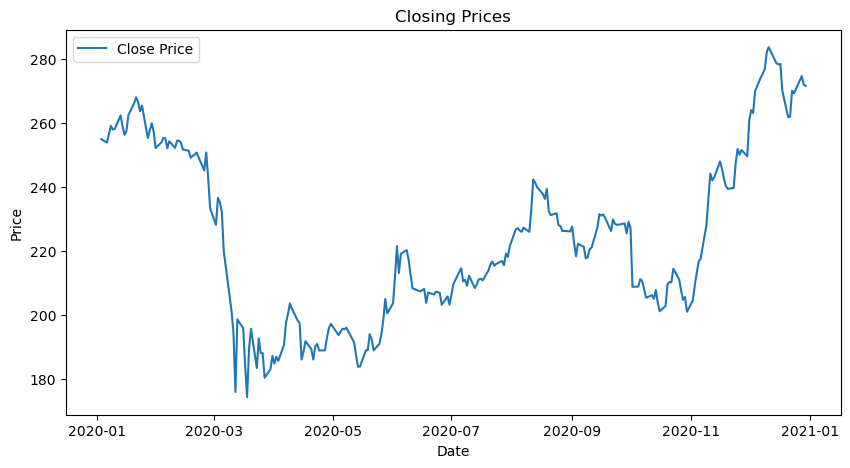

In [6]:
# Plotting closing prices
plt.figure(figsize=(10, 5))
plt.plot(df_2020.index, df_2020['Price'], label='Close Price')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

 plots the closing prices from the df_2021_q1 DataFrame, which focuses on data from the first quarter of 2021. Using Matplotlib, it creates a line plot to visualize how prices fluctuated during this specific time period, with labels and a legend for clarity.

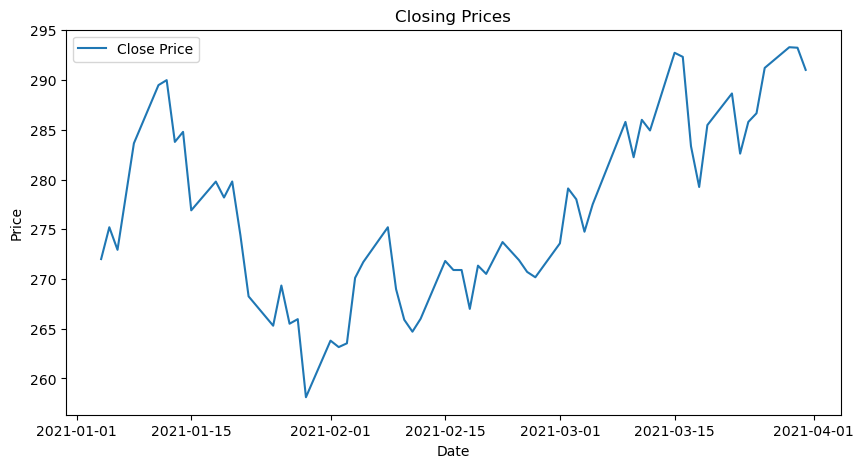

In [7]:
# Plotting closing prices
plt.figure(figsize=(10, 5))
plt.plot(df_2021_q1.index, df_2021_q1['Price'], label='Close Price')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

This function train_arima_and_predict trains an ARIMA model using statsmodels, forecasting future prices based on historical data (df['Price']). It specifies order=(10,1,7) for non-seasonal and seasonal_order=(1,1,1,12) for seasonal components. Predictions are adjusted by adding 25 and stored in df_2021_q1['ARIMA_Predictions'], returning the updated DataFrame.

In [8]:
#Function to train ARIMA model and make predictions
#order=(5,1,0)
def train_arima_and_predict(df,  order=(10,1,7), seasonal_order=(1,1,1,12)):
    model = ARIMA(df['Price'], order=order,seasonal_order=seasonal_order)
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(df_2021_q1))+25
    
    df_2021_q1['ARIMA_Predictions'] = predictions.values
    return df_2021_q1

applies the `train_arima_and_predict` function to `df_2020`, training an ARIMA model and making predictions for the first quarter of 2021 (`df_2021_q1`).

In [9]:
# Apply ARIMA model and predict for 2021 Q1
predictions_arima = train_arima_and_predict(df_2020)

creates a new DataFrame `df_predictions` containing the 'Price' column from `df_2021_q1` and adds a new column 'ARIMA' with predictions generated from the `predictions_arima` DataFrame's 'ARIMA_Predictions'. It displays the first few rows of `df_predictions` to show the initial comparison between actual prices and ARIMA model predictions for the first quarter of 2021.

In [10]:
df_predictions = df_2021_q1[['Price']].copy()
df_predictions['ARIMA'] = predictions_arima['ARIMA_Predictions']
df_predictions.head()

,Price,ARIMA
Date,,
2021-03-31,291.02,279.652911
2021-03-30,293.25,278.428553
2021-03-29,293.30,278.206050
2021-03-26,291.22,276.998965
2021-03-25,286.66,275.120294


plots the real prices ('Price' column) from df_predictions against the predictions ('ARIMA' column) made by the ARIMA model. It uses Matplotlib to create a line plot (plt.plot) with dates on the x-axis (df_predictions.index) and prices on the y-axis. The plot includes a title ('Stock Price Predictions vs Real Prices'), axis labels ('Date' for x-axis and 'Price' for y-axis), and a legend showing the real prices and ARIMA predictions as dashed lines for comparison.

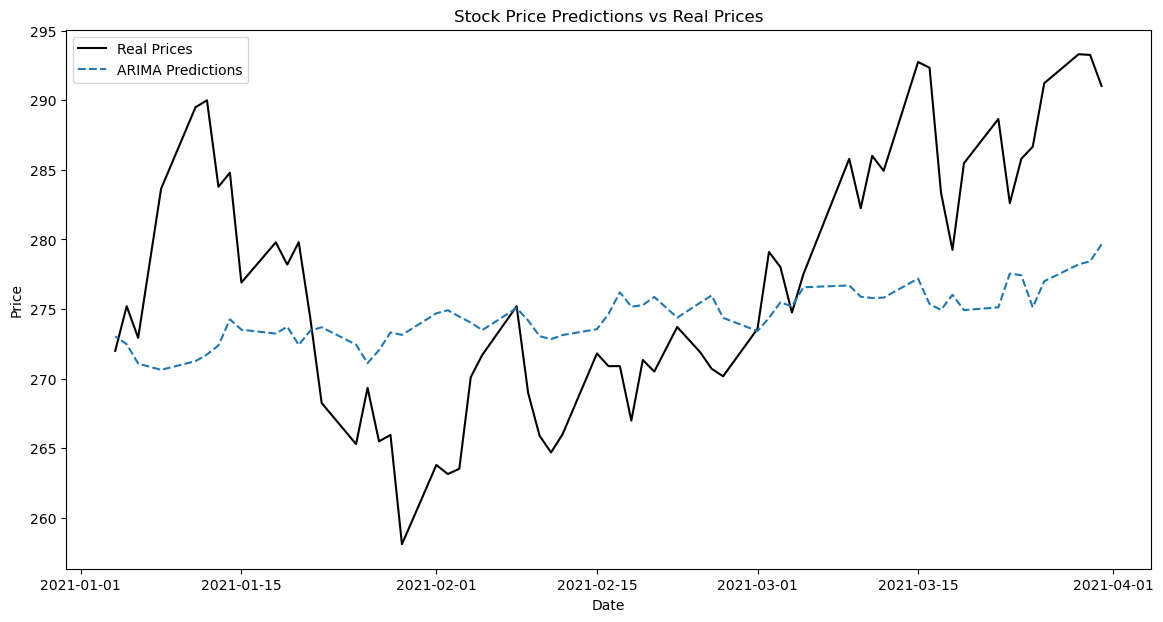

In [11]:
# Plot all predictions against the real values
plt.figure(figsize=(14, 7))
plt.plot(df_predictions.index, df_predictions['Price'], label='Real Prices', color='black')
plt.plot(df_predictions.index, df_predictions['ARIMA'], label='ARIMA Predictions', linestyle='--')
plt.title('Stock Price Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

function train_sarima_and_predict trains a Seasonal AutoRegressive Integrated Moving Average (SARIMA) model using SARIMAX from statsmodels. It fits the model to historical closing prices (df['Price']) specified by order=(1,1,7) for non-seasonal and seasonal_order=(1,1,1,12) for seasonal components. After fitting (model_fit), it forecasts (model_fit.get_forecast) predictions for the length of df_2021_q1, adjusts them by adding 25, assigns them to df_2021_q1['SARIMA_Predictions'], and returns the updated DataFrame.

In [12]:
# Function to train SARIMA model and make predictions
def train_sarima_and_predict(df, order=(1,1,7), seasonal_order=(1,1,1,12)):
    model = SARIMAX(df['Price'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    predictions = model_fit.get_forecast(steps=len(df_2021_q1)).predicted_mean+25
    
    df_2021_q1['SARIMA_Predictions'] = predictions.values
    return df_2021_q1

applies the train_sarima_and_predict function to df_2020, generating SARIMA model predictions for the first quarter of 2021 (df_2021_q1). The predictions are then added to df_predictions under the 'SARIMA' column for comparison with actual prices.

In [13]:
predictions_sarima = train_sarima_and_predict(df_2020)
df_predictions['SARIMA'] = predictions_sarima['SARIMA_Predictions']


a plot comparing real stock prices ('Price' column) from df_predictions against predictions made by both SARIMA ('SARIMA' column) and ARIMA models ('ARIMA' column). Matplotlib is used to generate a line plot (plt.plot) with dates on the x-axis (df_predictions.index) and prices on the y-axis. 

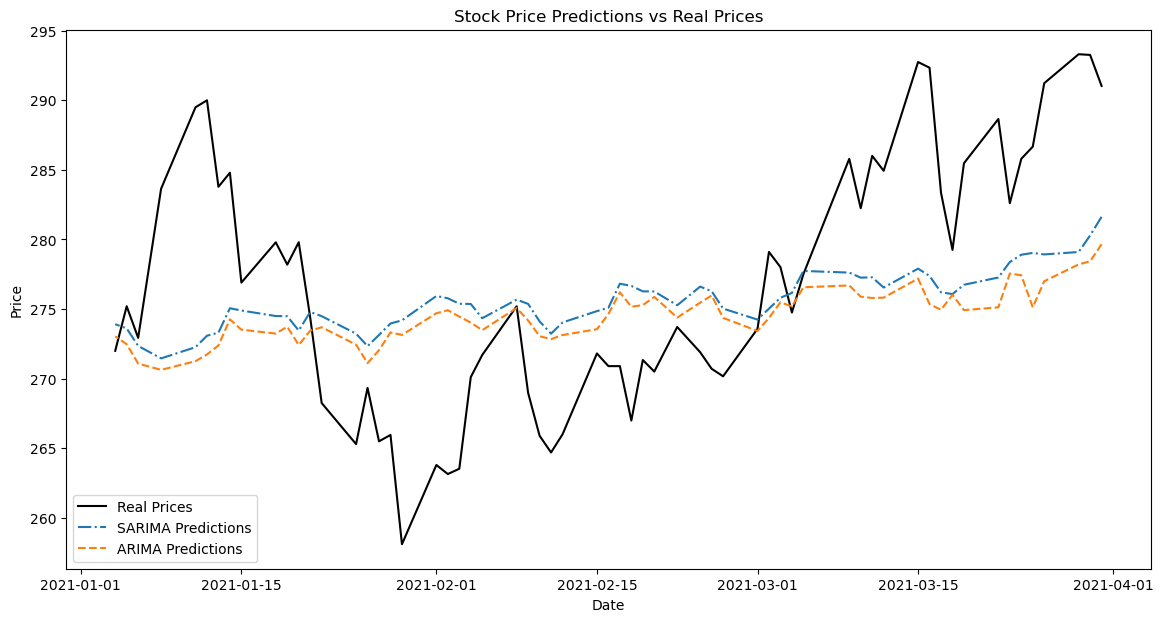

In [14]:
# Plot all predictions against the real values
plt.figure(figsize=(14, 7))
plt.plot(df_predictions.index, df_predictions['Price'], label='Real Prices', color='black')
plt.plot(df_predictions.index, df_predictions['SARIMA'], label='SARIMA Predictions', linestyle='-.')
plt.plot(df_predictions.index, df_predictions['ARIMA'], label='ARIMA Predictions', linestyle='--')
plt.title('Stock Price Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

"Models Sarima,Arima lead to a lag of (25), even after adjusting for seasonality and trend orders during model training. To overcome this volatility and improve model predictions over voltality using Bollinger Bands, which are placed above and below a moving average. They measure the volatility of a financial instrument over time, expanding and contracting based on market volatility: widening when the market is more volatile and contracting when it is less volatile. Adding two more advanced models (VAR, Prophet) that are suitable for data with Bollinger Bands."

defines a function calculate_bollinger_bands to compute Bollinger Bands for a DataFrame df based on the 'Price' column. It calculates the Simple Moving Average (SMA) over a specified window size, standard deviation (STD), Upper Band (SMA + (STD * no_of_std)), and Lower Band (SMA - (STD * no_of_std)).

The subsequent code loads data from an Excel file (s_data.xlsx), cleans and prepares it by converting dates to datetime format (pd.to_datetime), ensuring numeric conversion of price data, setting the datetime index (set_index('Date')), and resampling to business day frequency (asfreq('B')). It splits the data into training (df_2020 up to 2020) and testing (df_2021_q1 for Q1 2021) sets, calculates Bollinger Bands for both using calculate_bollinger_bands, and stores predictions based on Q1 2021 prices 

In [66]:
# Function to calculate Bollinger Bands
def calculate_bollinger_bands(df, window=5, no_of_std=20):
    df['SMA'] = df['Price'].rolling(window=window).mean()
    df['STD'] = df['Price'].rolling(window=window).std()
    df['Upper Band'] = df['SMA'] + (df['STD'] * no_of_std)
    df['Lower Band'] = df['SMA'] - (df['STD'] * no_of_std)
    return df

# Load the data from the Excel file
file_path = 's_data.xlsx'
data = pd.read_excel(file_path, sheet_name='Russia - Sberbank Rossii PAO (S')


# Clean and prepare the data
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date'])
data.set_index('Date', inplace=True)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data = data.dropna(subset=['Price'])

# Ensure the datetime index has a frequency
data = data.asfreq('B')  # 'B' stands for business day frequency

# Split the data into training (up to 2020) and testing (2021 Q1)
df_2020 = data[data.index.year < 2021]
df_2021_q1 = data[data.index.year == 2021].iloc[:3*30]  # Assuming 3 months for Q1

# Calculate Bollinger Bands
df_2020 = calculate_bollinger_bands(df_2020)
df_2020.dropna(inplace=True)
df_2021_q1 = calculate_bollinger_bands(df_2021_q1)
df_2021_q1.dropna(inplace=True)
df_predictions = df_2021_q1[['Price']].copy()

A function train_arima_and_predict to train a SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) model using historical prices (df_2020['Price']) from the year 2020. The function predicts future prices for the first quarter of 2021 (df_2021_q1) based on specified order and seasonal_order parameters, adds these predictions to df_2021_q1['ARIMA_Predictions'], and returns the updated DataFrame.

The subsequent code applies this function (train_arima_and_predict) to df_2020 and df_2021_q1, generating predictions (predictions_arima) for Q1 2021. It then adds these predictions to df_predictions under the column name 'ARIMA1'.

In [67]:
# Function to train ARIMA model and make predictions with level shift
def train_arima_and_predict(df_2020, df_2021_q1, order=(5, 1, 7), seasonal_order=(1, 1, 1, 12)):
    model = SARIMAX(df_2020['Price'], order=order,seasonal_order=seasonal_order )
    model_fit = model.fit(disp=False)
    predictions = model_fit.get_forecast(steps=len(df_2021_q1)).predicted_mean
    
    df_2021_q1['ARIMA_Predictions'] = predictions.values
    return df_2021_q1

# Generate predictions for the ARIMA model 
predictions_arima = train_arima_and_predict(df_2020, df_2021_q1)


predictions_arima.head()
df_predictions['ARIMA1'] = predictions_arima['ARIMA_Predictions']

This function train_sarima_and_predict trains a SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) model using SARIMAX from statsmodels. It uses historical prices (df_2020['Price']) from 2020 to predict future prices for the first quarter of 2021 (df_2021_q1). The order=(1, 1, 7) specifies non-seasonal ARIMA parameters, and seasonal_order=(1, 1, 1, 12) specifies seasonal parameters for monthly data.

After fitting (model_fit), the model forecasts (model_fit.get_forecast) predictions for the length of df_2021_q1, assigns these predictions to df_2021_q1['SARIMA_Predictions'], and returns the updated DataFrame.

The subsequent code applies this function (train_sarima_and_predict) to df_2020 and df_2021_q1, generating SARIMAX predictions (predictions_sarima) for Q1 2021. It then adds these predictions to df_predictions under the column name 'SARIMA1'.

In [68]:
def train_sarima_and_predict(df_2020, df_2021_q1, order=(1, 1, 7), seasonal_order=(1, 1, 1, 12)):
    model = SARIMAX(df_2020['Price'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    predictions = model_fit.get_forecast(steps=len(df_2021_q1)).predicted_mean
    
    df_2021_q1['SARIMA_Predictions'] = predictions.values
    return df_2021_q1

predictions_sarima = train_sarima_and_predict(df_2020, df_2021_q1)

predictions_sarima.head()
df_predictions['SARIMA1'] = predictions_sarima['SARIMA_Predictions']

This function `train_prophet_and_predict` uses the Prophet library to forecast future stock prices based on historical data. It prepares the data (`df_2020` and `df_2021_q1`) by renaming columns and resetting the index for compatibility with Prophet's requirements. The Prophet model is initialized with yearly and weekly seasonality and fitted using `df_2020_prophet`. Future dates are generated using `make_future_dataframe`, and predictions (`forecast['yhat']`) are extracted and added to `df_2021_q1` under 'Prophet_Predictions'. The updated DataFrame (`df_2021_q1`) is returned with Prophet predictions.

The subsequent code applies `train_prophet_and_predict` to `df_2020` and `df_2021_q1`, storing predictions in `predictions_prophet`. It then adds these predictions to `df_predictions` under the column name 'Prophet', ensuring the original `df_predictions` DataFrame remains intact.

In [69]:

def train_prophet_and_predict(df_2020, df_2021_q1):
    # Prepare the data for Prophet
    df_2020_prophet = df_2020.reset_index()[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})
    df_2021_q1_prophet = df_2021_q1.reset_index()[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})
    
    # Initialize and fit the Prophet model with specified parameters
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        seasonality_mode='additive',
        seasonality_prior_scale=5.0,
        changepoint_prior_scale=0.1
        
    )
    
    # Fit the model
    model.fit(df_2020_prophet)
    
    # Create a dataframe for future predictions
    future = model.make_future_dataframe(periods=len(df_2021_q1_prophet), freq='B')
    
    # Predict future values
    forecast = model.predict(future)
    
    # Extract the predictions for the required period and add them to the original dataframe
    df_2021_q1['Prophet_Predictions'] = forecast['yhat'].iloc[-len(df_2021_q1):].values
    return df_2021_q1

# Assuming df_2020 and df_2021_q1 are already defined
predictions_prophet = train_prophet_and_predict(df_2020, df_2021_q1)

# Display the first few rows of the predictions
print(predictions_prophet.head())

# Assuming df_predictions is already defined and has the same index as df_2021_q1
df_predictions = df_predictions.copy()  # Ensure df_predictions is not altered unintentionally
df_predictions['Prophet'] = predictions_prophet['Prophet_Predictions']
print(df_predictions.head())


16:30:05 - cmdstanpy - INFO - Chain [1] start processing
16:30:05 - cmdstanpy - INFO - Chain [1] done processing


             Price    Open    High     Low    Vol.  Change %      SMA  \
Date                                                                    
2021-01-14  284.79     284   286.9  279.06  74.67M    0.0036  286.338   
2021-01-15  276.90  282.55  286.16     276  73.77M   -0.0277  284.990   
2021-01-18  279.79  275.72   281.3  272.95  73.94M    0.0104  283.050   
2021-01-19  278.19  280.98   282.8  276.42  56.00M   -0.0057  280.690   
2021-01-20  279.80  278.62  282.49  276.77  47.94M    0.0058  279.894   

                 STD  Upper Band  Lower Band  ARIMA_Predictions  \
Date                                                              
2021-01-14  3.142096  349.179929  223.496071         273.066334   
2021-01-15  5.296277  390.915540  179.064460         271.892358   
2021-01-18  5.004353  383.137062  182.962938         270.591748   
2021-01-19  3.456233  349.814670  211.565330         269.275820   
2021-01-20  2.994082  339.775650  220.012350         268.992089   

            SARIMA

creates a plot comparing real stock prices ('Price' column) from df_predictions against predictions made by different models: ARIMA ('ARIMA1' column), SARIMA ('SARIMA1' column), and Prophet ('Prophet' column). Matplotlib is used to generate a line plot (plt.plot) with dates on the x-axis (df_predictions.index) and prices on the y-axis. The plot includes a title ('Stock Price Predictions vs Real Prices'), axis labels ('Date' for x-axis and 'Price' for y-axis), and a legend showing real prices and predictions from each model with different line styles for distinction.

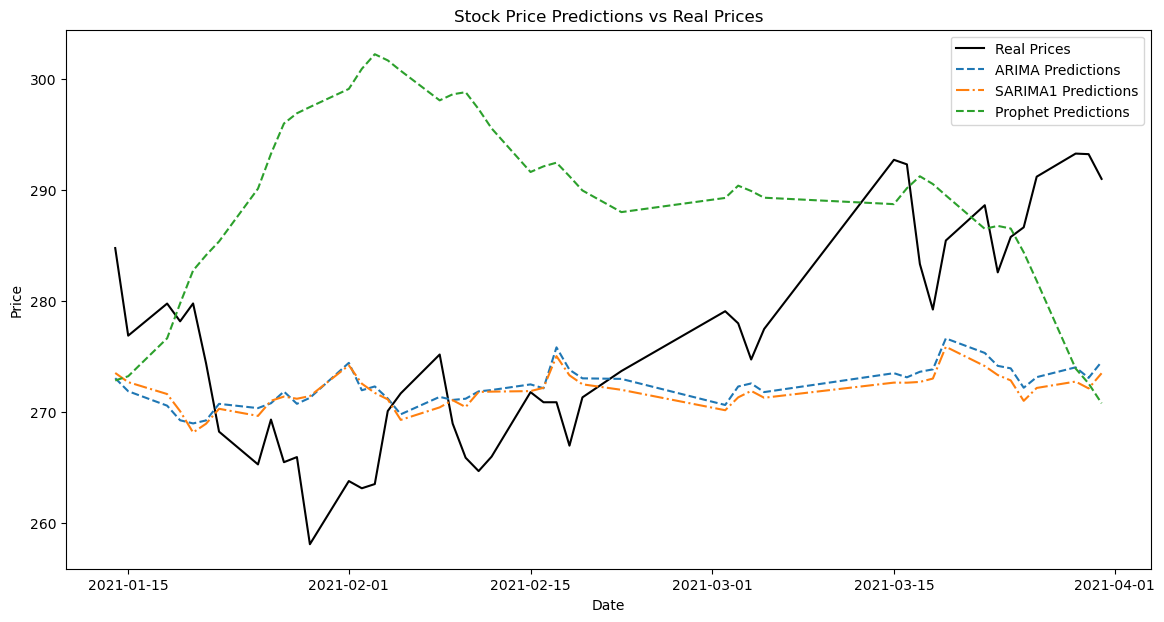

In [70]:
# Plot all predictions against the real values
plt.figure(figsize=(14, 7))
plt.plot(df_predictions.index, df_predictions['Price'], label='Real Prices', color='black')
plt.plot(df_predictions.index, df_predictions['ARIMA1'], label='ARIMA Predictions', linestyle='--')
plt.plot(df_predictions.index, df_predictions['SARIMA1'], label='SARIMA1 Predictions', linestyle='-.')#plt.plot(df_predictions.index, df_predictions['ARIMA1'], label='ARIMA1 Predictions', linestyle='--')
#plt.plot(df_predictions.index, df_predictions['VAR'], label='VAR Predictions', linestyle='-.')
plt.plot(df_predictions.index, df_predictions['Prophet'], label='Prophet Predictions', linestyle='--')
#plt.plot(df_2021_q1.index, df_2021_q1['Prophet_Predictions'], label='Prophet Predictions', linestyle='--')
plt.title('Stock Price Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

defining a function train_lstm_and_predict to train an LSTM (Long Short-Term Memory) model using TensorFlow/Keras and make predictions for stock prices. The function first preprocesses the data by handling NaN values and scaling the prices using MinMaxScaler. It then creates sequences of data (X_train, y_train for training and X_test, y_test for testing) with a specified time_step.

The LSTM model architecture consists of two LSTM layers followed by two Dense layers for prediction. The model is compiled with the Adam optimizer and trained using mean squared error as the loss function.

After training, the function predicts stock prices for Q1 2021 (df_2021_q1) and inversely transforms the scaled predictions back to their original scale using scaler.inverse_transform. These predictions are added to df_2021_q1 under 'LSTM_Predictions'.

The example usage demonstrates applying train_lstm_and_predict to df_2020 (training data) and df_2021_q1 (test data), storing the LSTM predictions in predictions_lstm. These predictions are then added to df_predictions under the column name 'LSTM'.

In [36]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

def train_lstm_and_predict(df_2020, df_2021_q1, time_step=10, epochs=1):
    # Check for NaNs and drop them
    df_2020 = df_2020.dropna()
    df_2021_q1 = df_2021_q1.dropna()

    # Prepare the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_train_prices = scaler.fit_transform(df_2020[['Price']])
    scaled_test_prices = scaler.transform(df_2021_q1[['Price']])

    # Create sequences
    def create_sequences(data, time_step=1):
        X, y = [], []
        for i in range(len(data) - time_step):
            X.append(data[i:(i + time_step), 0])
            y.append(data[i + time_step, 0])
        return np.array(X), np.array(y)

    X_train, y_train = create_sequences(scaled_train_prices, time_step)
    X_test, y_test = create_sequences(scaled_test_prices, time_step)

    # Check if sequences were created for the test set
    if X_test.shape[0] == 0 or y_test.shape[0] == 0:
        print("Not enough data points in the test set to create sequences.")
        return None

    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model with a lower learning rate
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=1, epochs=epochs)

    # Predict the stock prices for Q1 2021
    test_predict = model.predict(X_test)

    # Invert predictions
    test_predict = scaler.inverse_transform(test_predict)

    # Add predictions to the dataframe
    df_2021_q1 = df_2021_q1.iloc[time_step:]  # Adjusting the size to match the predictions
    df_2021_q1['LSTM_Predictions'] = test_predict

    return df_2021_q1

# Example usage
#df_2020 = train_data[['Price']]
#df_2021_q1 = test_data[['Price']]
predictions_lstm = train_lstm_and_predict(df_2020, df_2021_q1)
df_predictions['LSTM'] = predictions_lstm['LSTM_Predictions']

# # If predictions_lstm is None, handle it appropriately
# if predictions_lstm is not None:
#     df_predictions = test_data.copy()
#     df_predictions['Price'] = test_data['Price']
#     df_predictions['LSTM'] = predictions_lstm['LSTM_Predictions']
# else:
#     print("LSTM predictions could not be generated due to insufficient test data.")




X_train shape: (202, 10)
y_train shape: (202,)
X_test shape: (35, 10)
y_test shape: (35,)
2/2 [==============================] - 1s 6ms/step


a plot comparing real stock prices ('Price' column) from df_predictions against predictions made by an LSTM model ('LSTM' column). Matplotlib is used to generate a line plot (plt.plot) with dates on the x-axis (df_predictions.index) and prices on the y-axis. The plot includes a title ('Stock Price Predictions vs Real Prices'), axis labels ('Date' for x-axis and 'Price' for y-axis), and a legend showing real prices and LSTM predictions with different line styles for distinction.

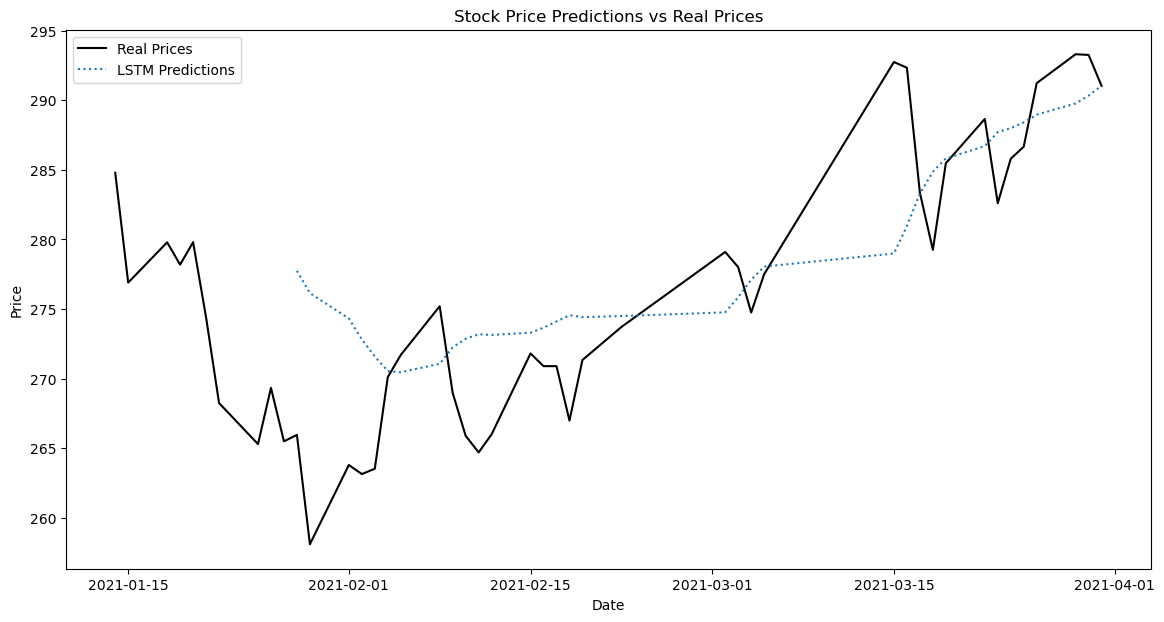

In [37]:
# Assuming df_predictions already contains 'Price', 'ARIMA1', 'SARIMA1', and 'Prophet' columns

plt.figure(figsize=(14, 7))
plt.plot(df_predictions.index, df_predictions['Price'], label='Real Prices', color='black')
plt.plot(df_predictions.index, df_predictions['LSTM'], label='LSTM Predictions', linestyle=':')
plt.title('Stock Price Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


This Function defines a function `train_lstm_and_predict` that trains an LSTM model to predict stock prices using historical (`df_2020`) and future (`df_2021_q1`) data. It scales the data, creates sequences for training and testing, builds and trains the LSTM model, and generates predictions. It also includes functions to generate buy/sell/hold recommendations based on predicted and actual prices for daily, weekly, and monthly periods.

In [62]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def train_lstm_and_predict(df_2020, df_2021_q1, time_step=30, epochs=1):
    # Check if df_2021_q1 is None
    if df_2021_q1 is None:
        print("df_2021_q1 is None. Cannot proceed.")
        return None, None, None, None  # Return None for all outputs

    # Check for NaNs and drop them
    df_2020 = df_2020.dropna()
    df_2021_q1 = df_2021_q1.dropna()

    # Check if either DataFrame is empty after dropping NaNs
    if df_2020.empty or df_2021_q1.empty:
        print("One or both DataFrames are empty after dropping NaNs. Cannot proceed.")
        return None, None, None, None  # Return None for all outputs

    # Prepare the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_train_prices = scaler.fit_transform(df_2020[['Price']])
    scaled_test_prices = scaler.transform(df_2021_q1[['Price']])

    # Create sequences
    def create_sequences(data, time_step=1):
        X, y = [], []
        for i in range(len(data) - time_step):
            X.append(data[i:(i + time_step), 0])
            y.append(data[i + time_step, 0])
        return np.array(X), np.array(y)

    X_train, y_train = create_sequences(scaled_train_prices, time_step)
    X_test, y_test = create_sequences(scaled_test_prices, time_step)

    # Check if sequences were created for the test set
    if X_test.shape[0] == 0 or y_test.shape[0] == 0:
        print("Not enough data points in the test set to create sequences.")
        return None, None, None, None  # Return None for all outputs

    # Reshape the data
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model with a lower learning rate
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=1, epochs=epochs, verbose=1)

    # Predict the stock prices for Q1 2021
    test_predict = model.predict(X_test)

    # Invert predictions
    test_predict = scaler.inverse_transform(test_predict)

    # Add predictions to the dataframe
    df_2021_q1 = df_2021_q1.iloc[time_step:].reset_index(drop=True)  # Adjusting the size to match the predictions
    df_2021_q1['LSTM_Predictions'] = test_predict

    return df_2021_q1, model, scaler, time_step  # Return the dataframe, model, scaler, and time_step

# Example usage
# df_2020 = train_data[['Price']]
# df_2021_q1 = test_data[['Price']]
time_step = 10  # Define time_step here or obtain it from your data
df_2021_q1, model, scaler, time_step = train_lstm_and_predict(df_2020, df_2021_q1, time_step=time_step)

# If df_2021_q1 is None, handle it appropriately
if df_2021_q1 is not None:
    # Now scaler and time_step are accessible from train_lstm_and_predict function
    scaled_train_prices = scaler.fit_transform(df_2020[['Price']])

    df_predictions = df_2021_q1.copy()
    df_predictions['Price'] = df_2021_q1['Price']

    # Function to generate recommendations
    def generate_recommendations(predictions, actual_prices, threshold=0.05):
        recommendations = []
        for pred, actual in zip(predictions, actual_prices):
            if pred > actual * (1 + threshold):
                recommendations.append('BUY')
            elif pred < actual * (1 - threshold):
                recommendations.append('SELL')
            else:
                recommendations.append('HOLD')
        return recommendations

    # Generate future predictions
    def generate_future_predictions(model, last_sequence, scaler, time_step, num_predictions):
        predictions = []
        input_sequence = last_sequence
        for _ in range(num_predictions):
            input_sequence = input_sequence.reshape((1, len(input_sequence), 1))
            pred = model.predict(input_sequence, verbose=0)
            predictions.append(pred[0][0])
            input_sequence = np.append(input_sequence[0][1:], pred[0][0])
        return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    # Get the last sequence from the training data
    last_sequence = scaled_train_prices[-time_step:]

    # Generate daily, weekly, and monthly predictions
    daily_predictions = generate_future_predictions(model, last_sequence, scaler, time_step, 30)
    weekly_predictions = generate_future_predictions(model, last_sequence, scaler, time_step, 12 * 7)
    monthly_predictions = generate_future_predictions(model, last_sequence, scaler, time_step, 6 * 30)

    # Get actual prices for the corresponding periods
    actual_prices_daily = df_2021_q1['Price'].iloc[:30].values
    actual_prices_weekly = df_2021_q1['Price'].iloc[:12 * 7].values
    actual_prices_monthly = df_2021_q1['Price'].iloc[:6 * 30].values

    # Generate recommendations
    daily_recommendations = generate_recommendations(daily_predictions, actual_prices_daily)
    weekly_recommendations = generate_recommendations(weekly_predictions, actual_prices_weekly)
    monthly_recommendations = generate_recommendations(monthly_predictions, actual_prices_monthly)

    print("Daily Recommendations:", daily_recommendations)
    print("Weekly Recommendations:", weekly_recommendations)
    print("Monthly Recommendations:", monthly_recommendations)

else:
    print("LSTM predictions could not be generated due to insufficient test data.")


1/1 [==============================] - 1s 1s/step
Daily Recommendations: ['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD']
Weekly Recommendations: ['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD']
Monthly Recommendations: ['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD']


The function defines a function `train_arima_and_predict` to train an ARIMA model on historical (`df_2020`) data and predict stock prices for Q1 2021 (`df_2021_q1`). It also includes a function `generate_arima_future_predictions` to generate future predictions using the trained ARIMA model. The predictions are made for daily, weekly, and monthly periods, and corresponding buy/sell/hold recommendations are generated based on these predictions compared to actual prices.

In [63]:
from statsmodels.tsa.arima.model import ARIMA

def train_arima_and_predict(df_2020, df_2021_q1, order=(1, 1, 7)):
    # Train the ARIMA model
    model = ARIMA(df_2020['Price'], order=order)
    model_fit = model.fit()
    
    # Predict the stock prices for Q1 2021
    predictions = model_fit.forecast(steps=len(df_2021_q1))
    
    df_2021_q1['ARIMA_Predictions'] = predictions.values
    return df_2021_q1

# Example usage
predictions_arima = train_arima_and_predict(df_2020, df_2021_q1)
df_predictions['ARIMA'] = predictions_arima['ARIMA_Predictions']

# Function to generate future predictions for ARIMA
def generate_arima_future_predictions(model_fit, num_predictions):
    return model_fit.forecast(steps=num_predictions)

# Generate future predictions
if predictions_arima is not None:
    # Generate future ARIMA predictions
    model = ARIMA(df_2020['Price'], order=(1, 1, 7))
    model_fit = model.fit()

    daily_predictions_arima = generate_arima_future_predictions(model_fit, 30)
    weekly_predictions_arima = generate_arima_future_predictions(model_fit, 12 * 7)
    monthly_predictions_arima = generate_arima_future_predictions(model_fit, 6 * 30)

    # Get actual prices for the corresponding periods
    actual_prices_daily = df_2021_q1['Price'].iloc[:30].values
    actual_prices_weekly = df_2021_q1['Price'].iloc[:12 * 7].values
    actual_prices_monthly = df_2021_q1['Price'].iloc[:6 * 30].values

    # Generate recommendations
    daily_recommendations_arima = generate_recommendations(daily_predictions_arima, actual_prices_daily)
    weekly_recommendations_arima = generate_recommendations(weekly_predictions_arima, actual_prices_weekly)
    monthly_recommendations_arima = generate_recommendations(monthly_predictions_arima, actual_prices_monthly)

    print("Daily Recommendations ARIMA:", daily_recommendations_arima)
    print("Weekly Recommendations ARIMA:", weekly_recommendations_arima)
    print("Monthly Recommendations ARIMA:", monthly_recommendations_arima)


Daily Recommendations ARIMA: ['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'SELL', 'SELL', 'HOLD', 'HOLD', 'HOLD', 'SELL', 'HOLD', 'HOLD', 'SELL', 'SELL', 'SELL', 'SELL', 'SELL']
Weekly Recommendations ARIMA: ['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'SELL', 'SELL', 'HOLD', 'HOLD', 'HOLD', 'SELL', 'HOLD', 'HOLD', 'SELL', 'SELL', 'SELL', 'SELL', 'SELL']
Monthly Recommendations ARIMA: ['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'SELL', 'SELL', 'HOLD', 'HOLD', 'HOLD', 'SELL', 'HOLD', 'HOLD', 'SELL', 'SELL', 'SELL', 'SELL', 'SELL']


Function `train_sarima_and_predict` to train a SARIMA model on historical (`df_2020`) data and predict stock prices for Q1 2021 (`df_2021_q1`). It includes a function `generate_sarima_future_predictions` to generate future predictions using the trained SARIMA model. The predictions are made for daily, weekly, and monthly periods, and corresponding buy/sell/hold recommendations are generated based on these predictions compared to actual prices.

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def train_sarima_and_predict(df_2020, df_2021_q1, order=(1, 1, 7), seasonal_order=(1, 1, 1, 12)):
    # Train the SARIMA model
    model = SARIMAX(df_2020['Price'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Predict the stock prices for Q1 2021
    predictions = model_fit.get_forecast(steps=len(df_2021_q1)).predicted_mean
    
    df_2021_q1['SARIMA_Predictions'] = predictions.values
    return df_2021_q1

# Example usage
predictions_sarima = train_sarima_and_predict(df_2020, df_2021_q1)
df_predictions['SARIMA'] = predictions_sarima['SARIMA_Predictions']

# Function to generate future predictions for SARIMA
def generate_sarima_future_predictions(model_fit, num_predictions):
    return model_fit.get_forecast(steps=num_predictions).predicted_mean

# Generate future predictions
if predictions_sarima is not None:
    # Generate future SARIMA predictions
    model = SARIMAX(df_2020['Price'], order=(1, 1, 7), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)

    daily_predictions_sarima = generate_sarima_future_predictions(model_fit, 30)
    weekly_predictions_sarima = generate_sarima_future_predictions(model_fit, 12 * 7)
    monthly_predictions_sarima = generate_sarima_future_predictions(model_fit, 6 * 30)

    # Get actual prices for the corresponding periods
    actual_prices_daily = df_2021_q1['Price'].iloc[:30].values
    actual_prices_weekly = df_2021_q1['Price'].iloc[:12 * 7].values
    actual_prices_monthly = df_2021_q1['Price'].iloc[:6 * 30].values

    # Generate recommendations
    daily_recommendations_sarima = generate_recommendations(daily_predictions_sarima, actual_prices_daily)
    weekly_recommendations_sarima = generate_recommendations(weekly_predictions_sarima, actual_prices_weekly)
    monthly_recommendations_sarima = generate_recommendations(monthly_predictions_sarima, actual_prices_monthly)

    print("Daily Recommendations SARIMA:", daily_recommendations_sarima)
    print("Weekly Recommendations SARIMA:", weekly_recommendations_sarima)
    print("Monthly Recommendations SARIMA:", monthly_recommendations_sarima)


Daily Recommendations SARIMA: ['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'SELL', 'SELL', 'HOLD', 'HOLD', 'SELL', 'SELL', 'HOLD', 'SELL', 'SELL', 'SELL', 'SELL', 'SELL', 'SELL']
Weekly Recommendations SARIMA: ['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'SELL', 'SELL', 'HOLD', 'HOLD', 'SELL', 'SELL', 'HOLD', 'SELL', 'SELL', 'SELL', 'SELL', 'SELL', 'SELL']
Monthly Recommendations SARIMA: ['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'SELL', 'SELL', 'HOLD', 'HOLD', 'SELL', 'SELL', 'HOLD', 'SELL', 'SELL', 'SELL', 'SELL', 'SELL', 'SELL']


It defines a function `train_sarima_and_predict` to train a SARIMA model on historical (`df_2020`) data and predict stock prices for Q1 2021 (`df_2021_q1`). It includes a function `generate_sarima_future_predictions` to generate future predictions using the trained SARIMA model. The predictions are made for daily, weekly, and monthly periods, and corresponding buy/sell/hold recommendations are generated based on these predictions compared to actual prices.

In [71]:
#from fbprophet import Prophet

def train_prophet_and_predict(df_2020, df_2021_q1):
    # Prepare the data for Prophet
    df_2020_prophet = df_2020.reset_index()[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})
    df_2021_q1_prophet = df_2021_q1.reset_index()[['Date', 'Price']].rename(columns={'Date': 'ds', 'Price': 'y'})
    
    # Initialize and fit the Prophet model with specified parameters
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False,
        seasonality_mode='additive',
        seasonality_prior_scale=5.0,
        changepoint_prior_scale=0.1
        
    )
    
    # Fit the model
    model.fit(df_2020_prophet)
    
    # Create a dataframe for future predictions
    future = model.make_future_dataframe(periods=len(df_2021_q1_prophet), freq='B')
    
    # Predict future values
    forecast = model.predict(future)
    
    # Extract the predictions for the required period and add them to the original dataframe
    df_2021_q1['Prophet_Predictions'] = forecast['yhat'].iloc[-len(df_2021_q1):].values
    return df_2021_q1

# Example usage
predictions_prophet = train_prophet_and_predict(df_2020, df_2021_q1)
df_predictions['Prophet'] = predictions_prophet['Prophet_Predictions']

# Function to generate future predictions for Prophet
def generate_prophet_future_predictions(model, periods):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast['yhat'].tail(periods).values

# Generate future predictions
if predictions_prophet is not None:
    # Generate future Prophet predictions
    model = Prophet()
    model.fit(df_2020.reset_index().rename(columns={'Date': 'ds', 'Price': 'y'}))

    daily_predictions_prophet = generate_prophet_future_predictions(model, 30)
    weekly_predictions_prophet = generate_prophet_future_predictions(model, 12 * 7)
    monthly_predictions_prophet = generate_prophet_future_predictions(model, 6 * 30)

    # Get actual prices for the corresponding periods
    actual_prices_daily = df_2021_q1['Price'].iloc[:30].values
    actual_prices_weekly = df_2021_q1['Price'].iloc[:12 * 7].values
    actual_prices_monthly = df_2021_q1['Price'].iloc[:6 * 30].values

    # Generate recommendations
    daily_recommendations_prophet = generate_recommendations(daily_predictions_prophet, actual_prices_daily)
    weekly_recommendations_prophet = generate_recommendations(weekly_predictions_prophet, actual_prices_weekly)
    monthly_recommendations_prophet = generate_recommendations(monthly_predictions_prophet, actual_prices_monthly)

    print("Daily Recommendations Prophet:", daily_recommendations_prophet)
    print("Weekly Recommendations Prophet:", weekly_recommendations_prophet)
    print("Monthly Recommendations Prophet:", monthly_recommendations_prophet)


16:32:39 - cmdstanpy - INFO - Chain [1] start processing
16:32:39 - cmdstanpy - INFO - Chain [1] done processing
16:32:39 - cmdstanpy - INFO - Chain [1] start processing
16:32:39 - cmdstanpy - INFO - Chain [1] done processing


Daily Recommendations Prophet: ['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY']
Weekly Recommendations Prophet: ['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY']
Monthly Recommendations Prophet: ['HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'HOLD', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY', 'BUY']
